# 1.5.1 Capstone Narrative analytics and experimentation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("..../googleplaystore_3.csv", low_memory=False)

In [4]:
df.shape

(10840, 13)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
#drop duplicate rows
df = df.drop_duplicates()

In [7]:
#clean null data
df.dropna(how='any', inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [8]:
df.describe()

,Rating,Reviews
count,8886.000000,8.886000e+03
mean,4.187959,4.730928e+05
std,0.522428,2.906007e+06
min,1.000000,1.000000e+00
25%,4.000000,1.640000e+02
50%,4.300000,4.723000e+03
75%,4.500000,7.131325e+04
max,5.000000,7.815831e+07


In [9]:
#Cleaning prices
def price_clean(price):
    if price == '0':
        return 0
    else:
        price = price[1:]
        price = float(price)
        return price

df['Price'] = df['Price'].map(price_clean).astype(float)

Price Mean: 0.9635257708755347
Price Standard Dev: 16.194792488007106
Price Variance: 262.2713037296114


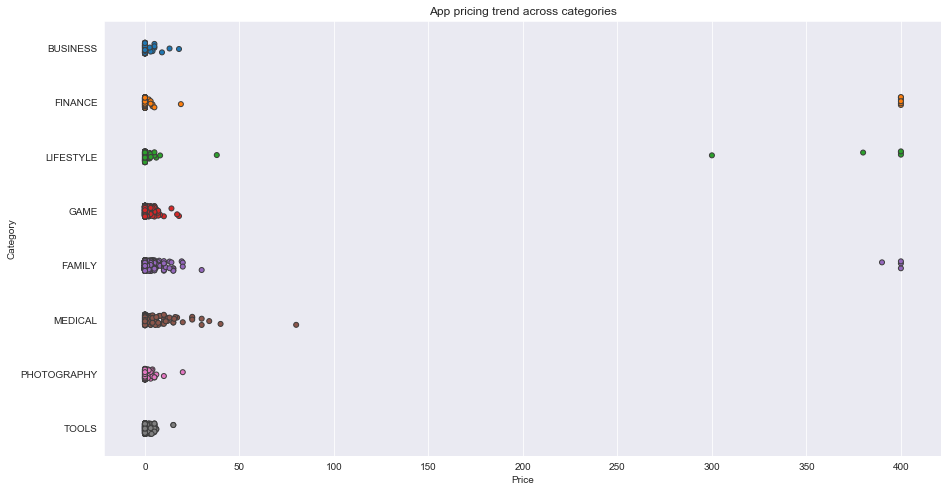

In [19]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')

print ('Price Mean:', df.Price.mean())
print ('Price Standard Dev:', df.Price.std())
print ('Price Variance:', df.Price.var())

# The Problem

As seen from the graph above, Finance, Lifestyle, Medical and Family apps are the most expensive and even extend upto $250. How do we decrease the app price?

# The Potential Solution

 We can compare rating and review parameters of high-cost apps to look for is there any correlation between them.

# The Method of Testing the Solution

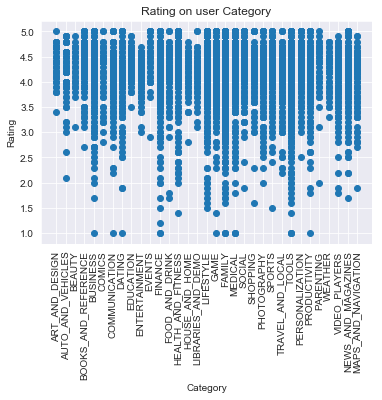

In [30]:
plt.scatter(x = df['Category'], y = df['Rating'])
plt.ylabel('Rating')
plt.xlabel('Category') 
plt.title('Rating on user Category')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()


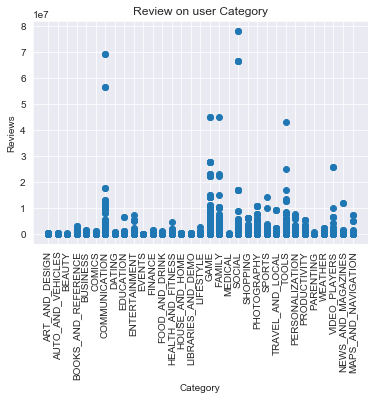

Ttest_indResult(statistic=4.506979918456882, pvalue=6.980316654002293e-06)


In [26]:
plt.scatter(x = df['Category'], y = df['Reviews'])
plt.ylabel('Reviews')
plt.xlabel('Category') 
plt.title('Review on user Category')
plt.tight_layout()

plt.xticks(rotation=90)

plt.show()

In [38]:
df_Rating_Family=df.loc[df.Category == 'FAMILY']['Rating']
df_Rating_Finance = df.loc[df.Category=='FINANCE']['Rating']

df_Reviews_Family=df.loc[df.Category == 'FAMILY']['Reviews']
df_Reviews_Finance = df.loc[df.Category=='FINANCE']['Reviews']

df_Rating_Medical=df.loc[df.Category == 'MEDICAL']['Rating']
df_Rating_Lifestyle = df.loc[df.Category=='LIFESTYLE']['Rating']

df_Reviews_Medical=df.loc[df.Category == 'MEDICAL']['Reviews']
df_Reviews_Lifestyle = df.loc[df.Category=='LIFESTYLE']['Reviews']

#rating and most expensive 
from scipy.stats import ttest_ind
print('FamilyRating vs FinanceRating:',ttest_ind(df_Rating_Family,df_Rating_Finance,equal_var=False))

#reviews and most expensive 
from scipy.stats import ttest_ind
print('FamilyReview vs FinanceReview:',ttest_ind(df_Reviews_Family,df_Reviews_Finance,equal_var=False))

from scipy.stats import ttest_ind
print('FamilyRating vs MedicalRating:',ttest_ind(df_Rating_Family,df_Rating_Medical,equal_var=False))

from scipy.stats import ttest_ind
print('FamilyReview vs MedicalReview:',ttest_ind(df_Reviews_Family,df_Reviews_Medical,equal_var=False))

from scipy.stats import ttest_ind
print('FamilyReview vs LifeReview:',ttest_ind(df_Reviews_Family,df_Reviews_Lifestyle,equal_var=False))

from scipy.stats import ttest_ind
print('FamilyRating vs LifeRating:',ttest_ind(df_Rating_Family,df_Rating_Lifestyle,equal_var=False))

FamilyRating vs FinanceRating: Ttest_indResult(statistic=1.662875669837391, pvalue=0.09713637442940923)
FamilyReview vs FinanceReview: Ttest_indResult(statistic=4.506979918456882, pvalue=6.980316654002293e-06)
FamilyRating vs MedicalRating: Ttest_indResult(statistic=0.2140730625339602, pvalue=0.830610364548947)
FamilyReview vs MedicalReview: Ttest_indResult(statistic=5.908208509035913, pvalue=4.160763658757504e-09)
FamilyReview vs LifeReview: Ttest_indResult(statistic=4.720162605511571, pvalue=2.523921031360956e-06)
FamilyRating vs LifeRating: Ttest_indResult(statistic=2.2641549578577904, pvalue=0.024153319051380844)


Our hypothesis is rating and review should be low values when the app price is high. To verify this, we calculated t-values of high-priced apps and we observed there is no significant difference with ratings but we observed a significant difference between with review values. This can be explained as there is bias.

We can test this on two separate groups. We can let the group use this app without any cost so we can explore deeper that users criticize the high price or the content.

As a result, if reviews and ratings are increased we can make the app completely free. To achieve this, a sponsor might be needed to cover costs.

Users will be chosen randomly and will be included as two separate group. First group uses the app with its price and with specified usage time. Second group uses the app without price and with specified usage time. We can make a comparison with these group’s review and rating values to revision current price of the application. Our success criteria is number of downloads and usage time of the application.